# A. Генератор точек в круге

- Ограничение времени	1 секунда
- Ограничение памяти	64Mb
- Ввод	стандартный ввод или input.txt
- Вывод	стандартный вывод или output.txt

Петя написал два генератора точек в круге:

def generate1():  
    a = uniform(0, 1)  
    b = uniform(0, 1)  
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))

def generate2():  
    while True:  
        x = uniform(-1, 1)  
        y = uniform(-1, 1)  
        if x ** 2 + y ** 2 > 1:  
            continue  
        return (x, y)

Даны 100 наборов по 1000 точек, каждый набор сгенерирован каким-то одним из этих двух алгоритмов. Необходимо определить для каждого набора, первый или второй алгоритм использовался для его генерации.
Для того, чтобы получить ОК по этой задаче, надо предсказать правильный генератор хотя бы для 98 наборов.

Формат ввода
Даны 100 строк. Каждая строка отвечает за свой набор точек.
В каждой строке находится 2000 действительных чисел (−1≤ai≤1), разделённых пробелом. Точки идут подряд, то есть формат строки: 
x0, y0, x1, y1, x2, y2 … x999, y999

Формат вывода
Нужно вывести 100 строк, в каждой из которой должно быть 1 число: 1 или 2, в зависимости от того, первым или вторым генератором был сгенерирован данный набор точек.

In [6]:
from math import cos, sin, pi
from numpy.random import uniform

def generate1():  
    a = uniform(0, 1)  
    b = uniform(0, 1)  
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))

def generate2():  
    while True:  
        x = uniform(-1, 1)  
        y = uniform(-1, 1)  
        if x ** 2 + y ** 2 > 1:  
            continue  
        return (x, y)

In [7]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

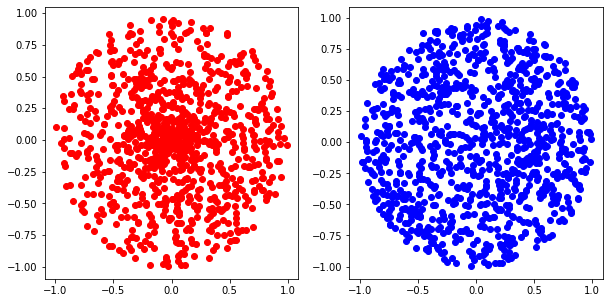

In [8]:
list1 = []
list2 = []


def generate_lists(n=1000):
     list1 = []
     list2 = [] 
     for i in range(1000):
          list1.append(generate1())
          list2.append(generate2())
     
     return list1, list2

list1, list2 = generate_lists()

list1x = [i[0] for i in list1]
list1y = [i[1] for i in list1]

list2x = [i[0] for i in list2]
list2y = [i[1] for i in list2]

fig, ax = plt.subplots(1, 2)

ax[0].scatter(list1x, list1y, c='r')
ax[1].scatter(list2x, list2y, c = 'b')

fig.set_size_inches(10, 5)
plt.show()


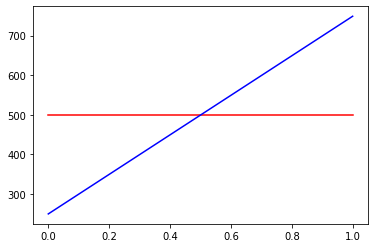

In [12]:
import numpy as np
from math import sqrt

list1, list2 = generate_lists()

def get_dict_radius_count(list_xy, n=3):
        
    radius_list = list(np.linspace(0, 1, n))
    dict_r_count = {}

    for i in range(len(radius_list)-1):
        min, max = radius_list[i], radius_list[i+1]
        for (x, y) in list_xy:
            r = sqrt(x**2 + y**2)
            if (r > min) and (r < max):
                if (max in dict_r_count.keys()):
                    dict_r_count[max] += 1
                else:
                    dict_r_count[max] = 0

    return dict_r_count

n=3
dict1 = get_dict_radius_count(list1)
dict2 = get_dict_radius_count(list2)

plt.plot(list(dict1.values()), c='r')
plt.plot(list(dict2.values()), c='b')

In [10]:
list_dict_1 = []
list_dict_2 = []

for i in range(1000):


    list1, list2 = generate_lists()
    dict1 = get_dict_radius_count(list1)
    dict2 = get_dict_radius_count(list2)

    list_dict_1.append(dict1)
    list_dict_2.append(dict2)
   
list_dict_1, list_dict_2

list_count1 = []
list_count2 = []

for d in list_dict_1:
    list_count1.append(min(*d.values()))

for d in list_dict_2:
    list_count2.append(min(*d.values()))
from statistics import mean

m1, m2 = mean(list_count1), mean(list_count2)
mean([m1, m2])

367.963

In [11]:
from math import sqrt

def get_lists(line):
    list_str = line.split()
    list_x = []
    list_y = []

    for i in range(len(list_str) // 2):
        ind = i * 2
        list_x.append(float(list_str[ind]))
        list_y.append(float(list_str[ind+1]))

    return list_x, list_y

def get_res(list_x, list_y):
    res = 2
    count = 0
    for x, y in zip(list_x, list_y):
        r = x*x + y*y
        if r < 0.25:
            count += 1
            if count > 367:
                res = 1
                break

    return res

input_file_name = 'input.txt'

with open(input_file_name, 'r') as f:
    for i in range(100):
        line = f.readline()
        list_x, list_y = get_lists(line)
        print(get_res(list_x, list_y))

IndentationError: expected an indented block (Temp/ipykernel_11416/3548509346.py, line 18)

In [13]:
0.5*0.5


0.25

In [ ]:
d = list_dict_1[0]
l1 = list(d.values())
min(l1)

NameError: name 'list_dict_1' is not defined

In [ ]:
min(1, 2)

1

In [ ]:
list(np.linspace(0, 1, 3))

[0.0, 0.5, 1.0]

In [ ]:
from math import atan, pi, cos, sin

def get_b(x, y):
    return atan(y/x) / 2 / pi

def is_a_equal(x, y, b, eps=0.000000000000001):
    ax = x / cos(2* pi* b)
    ay = y / sin(2* pi* b)

    res = abs(ax - ay) < eps

    return res

res = []

for (x, y) in list1:
    res.append(is_a_equal(x, y, get_b(x, y)))

for (x, y) in list2:
    res.append(is_a_equal(x, y, get_b(x, y)))

